In [0]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls 'drive/My Drive/PhD/Data/Sat/train'

AnnualCrop  HerbaceousVegetation  Industrial  PermanentCrop  River
Forest	    Highway		  Pasture     Residential    SeaLake


In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from skimage import transform
%matplotlib inline
import math

Using TensorFlow backend.


In [0]:
from keras.applications.vgg16 import preprocess_input

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 37s 0us/step


In [0]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
vgg16_model.layers.pop()

In [0]:
model = Sequential()
for layer in vgg16_model.layers:
  layer.trainable = False
  model.add(layer)

In [0]:
type(model)

keras.engine.sequential.Sequential

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
model.add(Dense(10, activation="softmax"))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_data_dir = 'drive/My Drive/PhD/Data/Sat/train'
valid_data_dir = 'drive/My Drive/PhD/Data/Sat/valid'
test_data_dir = 'drive/My Drive/PhD/Data/Sat/test'

In [0]:
img_width = 224
img_height = 224
batch_size = 25
# dategen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = ImageDataGenerator().flow_from_directory(
    'drive/My Drive/PhD/Data/Sat/train',
    target_size=(img_width, img_height),
    classes=
    [
        'Highway',
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'Residential',
        'PermanentCrop',
        'River',
        'Pasture',
        'Forest',
        'SeaLake'
    ],
    batch_size=batch_size)

valid_generator = ImageDataGenerator().flow_from_directory(
    'drive/My Drive/PhD/Data/Sat/valid',
    target_size=(img_width, img_height),
    classes=
    [
        'Highway',
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'Residential',
        'PermanentCrop',
        'River',
        'Pasture',
        'Forest',
        'SeaLake'
    ],
    batch_size=batch_size)
test_generator = ImageDataGenerator().flow_from_directory(
    'drive/My Drive/PhD/Data/Sat/test',
    target_size=(img_width, img_height),
    classes=
    [
        'Highway',
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'Residential',
        'PermanentCrop',
        'River',
        'Pasture',
        'Forest',
        'SeaLake'
    ],
    batch_size=batch_size,
    shuffle=False,)

Found 18900 images belonging to 10 classes.
Found 4050 images belonging to 10 classes.
Found 4050 images belonging to 10 classes.


In [0]:
# https://github.com/smileservices/keras_utils/blob/master/utils.py
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


0

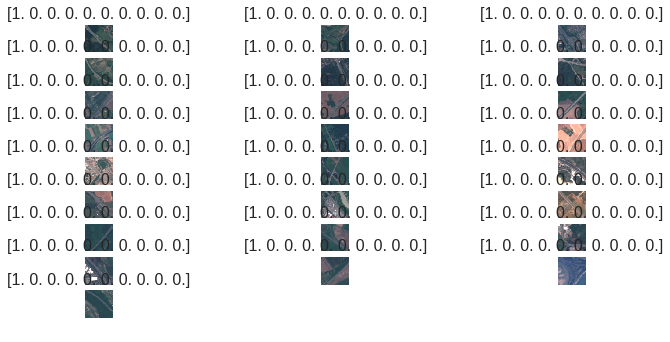

In [0]:
imgs, labels = next(test_generator)
plots(imgs, titles = labels)
np.argmax(labels[0])

In [0]:
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size)

Epoch 1/10
756/756 [==============================] - 247s 327ms/step - loss: 0.4686 - acc: 0.8598 - val_loss: 0.4077 - val_acc: 0.8889
Epoch 2/10
756/756 [==============================] - 247s 326ms/step - loss: 0.3195 - acc: 0.9067 - val_loss: 0.4679 - val_acc: 0.8758
Epoch 3/10
756/756 [==============================] - 247s 326ms/step - loss: 0.2628 - acc: 0.9254 - val_loss: 0.3061 - val_acc: 0.9183
Epoch 4/10
756/756 [==============================] - 247s 326ms/step - loss: 0.2431 - acc: 0.9301 - val_loss: 0.2560 - val_acc: 0.9341
Epoch 5/10
756/756 [==============================] - 246s 326ms/step - loss: 0.2185 - acc: 0.9387 - val_loss: 0.2901 - val_acc: 0.9262
Epoch 6/10
756/756 [==============================] - 246s 326ms/step - loss: 0.1945 - acc: 0.9420 - val_loss: 0.2791 - val_acc: 0.9304
Epoch 7/10
756/756 [==============================] - 247s 326ms/step - loss: 0.1784 - acc: 0.9476 - val_loss: 0.3321 - val_acc: 0.9188
Epoch 8/10
756/756 [============================

In [0]:
path = "/content/drive/My Drive/PhD/Data/landuse_model_18_02_2019.h5" 
model.save(path)

In [0]:
#del model
#model = keras.models.load_model('/content/drive/My Drive/PhD/Data/vgg16_trained.h5')
#model = keras.models.load_model('/content/drive/My Drive/PhD/Data/vgg16_multiclass_trained.h5')

In [0]:
# first you should re-define the network.
#model.load_weights('/content/drive/My Drive/PhD/Data/vgg16_multiclass_trained.h5')
model.load_weights('/content/drive/My Drive/PhD/Data/landuse_model_18_02_2019.h5')

In [0]:
predictions = model.predict_generator(test_generator, steps=test_generator.samples // batch_size)

In [0]:
# serialize predictions
import pickle
file_pi = open('/content/drive/My Drive/PhD/Data/predictions_18_02_2019.obj', 'wb') 
pickle.dump(predictions, file_pi)

In [0]:
# load serialized predictions
import pickle 
filehandler = open('/content/drive/My Drive/PhD/Data/predictions_18_02_2019.obj', 'r') 
predictions = pickle.load(filehandler)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
labels = test_generator.classes
#cm = confusion_matrix(labels, np.round(predictions[:, 0]))
cm = confusion_matrix(labels, np.argmax(predictions, axis=1))

NameError: ignored

Confusion matrix, without normalization
[[314  11   1   6   1   8  32   2   0   0]
 [  5 424   0   0   0   6   8   3   0   4]
 [  1   1 408   1   2  30   3   4   0   0]
 [  1   0   1 356   6   8   3   0   0   0]
 [  0   0   1  11 429   8   0   1   0   0]
 [  2   6  11   0   2 353   1   0   0   0]
 [ 17   7   1   2   1   0 342   2   1   2]
 [  3   4   4   1   0   3   7 276   2   0]
 [  0   0   7   0   1   0   2   5 434   1]
 [  0   0   0   0   0   0   4   2   0 444]]


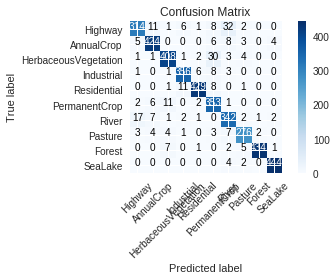

In [0]:
cm_plot_labels = ['Highway',
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'Residential',
        'PermanentCrop',
        'River',
        'Pasture',
        'Forest',
        'SeaLake']
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

In [0]:
accuracy_score(labels, np.argmax(predictions, axis=1))

0.9333333333333333

In [0]:
#precision_score(labels[:,], np.argmax(predictions, axis=1))

# Test Single Images


In [0]:
def load(filename):
  np_image = Image.open(filename)
  np_image = np.array(np_image).astype('float32')/255
  np_image = transform.resize(np_image, (224, 224, 3))
  np_image = np.expand_dims(np_image, axis=0)
  return np_image

In [0]:
pred = model.predict(load('fatih-1.png'))
print(np.argmax(pred*100))
res = np.argmax(pred, axis=1)
print(pred*100)
res[0]

In [0]:
model.predict_proba(load('HerbaceousVegetation_2612.jpg'))*100

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


array([[3.8531492e-16, 6.7785423e-04, 9.8759976e-14, 2.2593164e-23,
        1.1689909e-25, 3.7096390e-16, 1.2466019e-12, 6.0472352e-08,
        6.6771398e-05, 9.9999252e+01]], dtype=float32)

# Fatih

In [0]:
fatih_generator = ImageDataGenerator().flow_from_directory(
    'drive/My Drive/PhD/Data/Sat/fatih',
    target_size=(img_width, img_height),
    classes=
    [
        'Highway',
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'Residential',
        'PermanentCrop',
        'River',
        'Pasture',
        'Forest',
        'SeaLake'
    ],
    batch_size=batch_size,
    shuffle=False,)

Found 35 images belonging to 10 classes.


In [0]:
fatih_generator.class_indices

{'AnnualCrop': 1,
 'Forest': 8,
 'HerbaceousVegetation': 2,
 'Highway': 0,
 'Industrial': 3,
 'Pasture': 7,
 'PermanentCrop': 5,
 'Residential': 4,
 'River': 6,
 'SeaLake': 9}

In [0]:
fatih_generator.samples / batch_size

1.4

In [0]:
fatih_pred = model.predict_generator(fatih_generator, steps=math.ceil(fatih_generator.samples / batch_size))

In [0]:
for i in range(0, len(fatih_pred)):
  print(str(i) + ". " + fatih_generator.filenames[i] + "- Pred: " + str(np.argmax(fatih_pred[i])) + ": " +
        list(fatih_generator.class_indices.keys())[list(fatih_generator.class_indices.values()).index(np.argmax(fatih_pred[i]))])

0. Highway/img0_0.jpg- Pred: 4: Residential
1. Highway/img256_128.jpg- Pred: 3: Industrial
2. Highway/img256_192.jpg- Pred: 6: River
3. Highway/img256_256.jpg- Pred: 6: River
4. Highway/img256_64.jpg- Pred: 3: Industrial
5. Industrial/img128_192.jpg- Pred: 4: Residential
6. Industrial/img128_256.jpg- Pred: 2: HerbaceousVegetation
7. Industrial/img64_256.jpg- Pred: 4: Residential
8. Industrial/img64_64.jpg- Pred: 4: Residential
9. Residential/img0_128.jpg- Pred: 4: Residential
10. Residential/img0_192.jpg- Pred: 4: Residential
11. Residential/img0_320.jpg- Pred: 3: Industrial
12. Residential/img0_384.jpg- Pred: 4: Residential
13. Residential/img0_64.jpg- Pred: 4: Residential
14. Residential/img128_0.jpg- Pred: 4: Residential
15. Residential/img128_128.jpg- Pred: 4: Residential
16. Residential/img128_320.jpg- Pred: 4: Residential
17. Residential/img128_384.jpg- Pred: 3: Industrial
18. Residential/img128_64.jpg- Pred: 4: Residential
19. Residential/img192_0.jpg- Pred: 4: Residential
20. R

In [0]:
labels = fatih_generator.classes
cm_fatih = confusion_matrix(labels, np.argmax(fatih_pred, axis=1))

Confusion matrix, without normalization
[[ 0  0  2  1  2  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  2 19  1  0]
 [ 0  0  0  0  0  0]
 [ 0  0  1  0  2  0]]


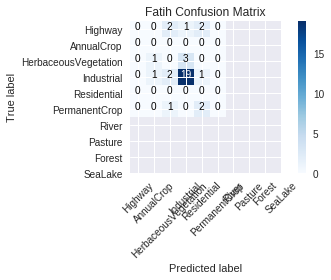

In [0]:
cm_plot_labels = [
    'Highway',
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'Residential',
        'PermanentCrop',
        'River',
        'Pasture',
        'Forest',
        'SeaLake']
plot_confusion_matrix(cm_fatih, cm_plot_labels, title="Fatih Confusion Matrix")

In [0]:
accuracy_score(labels, np.argmax(fatih_pred, axis=1))

0.5428571428571428

# Güllük

In [0]:
gulluk_generator = ImageDataGenerator().flow_from_directory(
    'drive/My Drive/PhD/Data/Sat/gulluk',
    target_size=(img_width, img_height),
    classes=
    [
        'Highway',
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'Residential',
        'PermanentCrop',
        'River',
        'Pasture',
        'Forest',
        'SeaLake'
    ],
    batch_size=batch_size,
    shuffle=False,)

gulluk_pred = model.predict_generator(gulluk_generator, steps=math.ceil(gulluk_generator.samples / batch_size))

Found 1024 images belonging to 10 classes.


In [0]:
for i in range(0, len(gulluk_pred)):
  print(str(i) + ". " + gulluk_generator.filenames[i] + "- Pred: " + str(np.argmax(gulluk_pred[i])) + ": " +
        list(gulluk_generator.class_indices.keys())[list(gulluk_generator.class_indices.values()).index(np.argmax(gulluk_pred[i]))])

0. Residential/img0_0.jpg- Pred: 4: Residential
1. Residential/img0_1024.jpg- Pred: 2: HerbaceousVegetation
2. Residential/img0_1088.jpg- Pred: 2: HerbaceousVegetation
3. Residential/img0_1152.jpg- Pred: 2: HerbaceousVegetation
4. Residential/img0_1216.jpg- Pred: 2: HerbaceousVegetation
5. Residential/img0_128.jpg- Pred: 2: HerbaceousVegetation
6. Residential/img0_1280.jpg- Pred: 4: Residential
7. Residential/img0_1344.jpg- Pred: 2: HerbaceousVegetation
8. Residential/img0_1408.jpg- Pred: 2: HerbaceousVegetation
9. Residential/img0_1472.jpg- Pred: 2: HerbaceousVegetation
10. Residential/img0_1536.jpg- Pred: 0: Highway
11. Residential/img0_1600.jpg- Pred: 2: HerbaceousVegetation
12. Residential/img0_1664.jpg- Pred: 2: HerbaceousVegetation
13. Residential/img0_1728.jpg- Pred: 2: HerbaceousVegetation
14. Residential/img0_1792.jpg- Pred: 2: HerbaceousVegetation
15. Residential/img0_1856.jpg- Pred: 2: HerbaceousVegetation
16. Residential/img0_192.jpg- Pred: 8: Forest
17. Residential/img0_19

# Siteler

In [0]:
siteler_generator = ImageDataGenerator().flow_from_directory(
    'drive/My Drive/PhD/Data/Sat/siteler',
    target_size=(img_width, img_height),
    classes=
    [
        'Highway',
        'AnnualCrop',
        'HerbaceousVegetation',
        'Industrial',
        'Residential',
        'PermanentCrop',
        'River',
        'Pasture',
        'Forest',
        'SeaLake'
    ],
    batch_size=batch_size,
    shuffle=False,)

Found 21 images belonging to 10 classes.


In [0]:
siteler_pred = model.predict_generator(siteler_generator, steps=math.ceil(siteler_generator.samples / batch_size))

In [0]:
siteler_pred[0]

array([4.4296906e-04, 1.5280736e-16, 1.3828640e-04, 9.9941373e-01,
       2.5311121e-22, 4.8604770e-06, 9.9239706e-08, 2.0476219e-16,
       4.4385372e-34, 1.2066972e-21], dtype=float32)

In [0]:
for i in range(0, len(siteler_pred)):
  print(str(i) + ". " + siteler_generator.filenames[i] + "- Pred: " + str(np.argmax(siteler_pred[i])) + ": " 
        + list(siteler_generator.class_indices.keys())[list(siteler_generator.class_indices.values()).index(np.argmax(siteler_pred[i]))])

0. Industrial/armada.jpg- Pred: 3: Industrial
1. Industrial/asti.jpg- Pred: 3: Industrial
2. Industrial/cepa.jpg- Pred: 5: PermanentCrop
3. Industrial/teknokent.jpg- Pred: 3: Industrial
4. Industrial/ulus.jpg- Pred: 4: Residential
5. Industrial/yurtlar.jpg- Pred: 2: HerbaceousVegetation
6. Residential/img0_0.jpg- Pred: 2: HerbaceousVegetation
7. Residential/img0_128.jpg- Pred: 2: HerbaceousVegetation
8. Residential/img0_192.jpg- Pred: 5: PermanentCrop
9. Residential/img0_256.jpg- Pred: 2: HerbaceousVegetation
10. Residential/img0_64.jpg- Pred: 2: HerbaceousVegetation
11. Residential/img128_0.jpg- Pred: 2: HerbaceousVegetation
12. Residential/img128_128.jpg- Pred: 3: Industrial
13. Residential/img128_192.jpg- Pred: 2: HerbaceousVegetation
14. Residential/img128_256.jpg- Pred: 3: Industrial
15. Residential/img128_64.jpg- Pred: 2: HerbaceousVegetation
16. Residential/img64_0.jpg- Pred: 2: HerbaceousVegetation
17. Residential/img64_128.jpg- Pred: 4: Residential
18. Residential/img64_192.jp